# Data Pre-processing

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# read in the cleaned flight dataset
flights_df = pd.read_csv('../data/lga_ord_flight_delay.csv')
flights_df.head()

,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DATE,DELAY_SEVERITY
0,4,UA,700,839,2015-01-01,on-time
1,4,AA,700,845,2015-01-01,on-time
2,4,NK,830,1008,2015-01-01,major
3,4,AA,845,1030,2015-01-01,on-time
4,4,UA,900,1039,2015-01-01,on-time


In [3]:
# read in the cleaned climate datasets
lga_climate_df = pd.read_csv('../data/lga_climate_by_day.csv')
ord_climate_df = pd.read_csv('../data/ord_climate_by_day.csv')

In [4]:
lga_climate_df.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-01,13.87,0.00,0.0,0.0,31.0,39.0,27.0,240.0,250.0,23.0,31.1
1,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-02,13.65,0.00,0.0,0.0,39.0,42.0,35.0,290.0,290.0,25.1,32.0
2,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-03,9.62,0.67,0.0,0.0,35.0,41.0,31.0,50.0,50.0,16.1,19.9
3,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-04,10.96,0.31,0.0,0.0,45.0,57.0,41.0,280.0,280.0,30.0,44.1
4,USW00014732,"LAGUARDIA AIRPORT, NY US",2015-01-05,20.80,0.00,0.0,0.0,42.0,50.0,22.0,300.0,300.0,32.0,49.0


In [5]:
ord_climate_df.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2015-01-01,14.54,0.00,0.0,0.0,20.0,32.0,14.0,240.0,250.0,23.9,30.0
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2015-01-02,4.70,0.00,0.0,0.0,26.0,34.0,15.0,150.0,150.0,12.1,13.0
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2015-01-03,5.59,0.57,0.4,0.0,31.0,34.0,29.0,140.0,140.0,13.0,14.1
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2015-01-04,15.88,0.13,2.2,1.2,29.0,33.0,2.0,320.0,320.0,25.9,31.1
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2015-01-05,10.29,0.15,1.8,2.0,2.0,6.0,-3.0,310.0,310.0,21.9,25.9


In [6]:
lga_climate_df.drop(['STATION','NAME'], axis=1, inplace=True)
ord_climate_df.drop(['STATION','NAME'], axis=1, inplace=True)

In [7]:
lga_climate_df.columns

Index(['DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2',
       'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [8]:
# rename columns to be more descriptive
new_col = ['DATE', 'avg_wind_speed', 'precipitation', 'snowfall', 'snow_depth', 'average_temp', 'max_temp', 'min_temp', 'wind_direction_fastest_2min',
       'wind_direction_fastest_5sec', 'wind_speed_fastest_2min', 'wind_speed_fastest_5sec']

In [9]:
lga_climate_df.columns = new_col
ord_climate_df.columns = new_col

In [10]:
# merge the climate dataframes and add airport code to distinguish each climate column
climate_lga_ord_df = pd.merge(lga_climate_df, ord_climate_df, on='DATE', suffixes=('_LGA', '_ORD'))
climate_lga_ord_df.head()

,DATE,avg_wind_speed_LGA,precipitation_LGA,snowfall_LGA,snow_depth_LGA,average_temp_LGA,max_temp_LGA,min_temp_LGA,wind_direction_fastest_2min_LGA,wind_direction_fastest_5sec_LGA,...,precipitation_ORD,snowfall_ORD,snow_depth_ORD,average_temp_ORD,max_temp_ORD,min_temp_ORD,wind_direction_fastest_2min_ORD,wind_direction_fastest_5sec_ORD,wind_speed_fastest_2min_ORD,wind_speed_fastest_5sec_ORD
0,2015-01-01,13.87,0.00,0.0,0.0,31.0,39.0,27.0,240.0,250.0,...,0.00,0.0,0.0,20.0,32.0,14.0,240.0,250.0,23.9,30.0
1,2015-01-02,13.65,0.00,0.0,0.0,39.0,42.0,35.0,290.0,290.0,...,0.00,0.0,0.0,26.0,34.0,15.0,150.0,150.0,12.1,13.0
2,2015-01-03,9.62,0.67,0.0,0.0,35.0,41.0,31.0,50.0,50.0,...,0.57,0.4,0.0,31.0,34.0,29.0,140.0,140.0,13.0,14.1
3,2015-01-04,10.96,0.31,0.0,0.0,45.0,57.0,41.0,280.0,280.0,...,0.13,2.2,1.2,29.0,33.0,2.0,320.0,320.0,25.9,31.1
4,2015-01-05,20.80,0.00,0.0,0.0,42.0,50.0,22.0,300.0,300.0,...,0.15,1.8,2.0,2.0,6.0,-3.0,310.0,310.0,21.9,25.9


In [11]:
# merge the flight data with the climate data
flight_delay_df = flights_df.merge(climate_lga_ord_df, 'left', 'DATE')
flight_delay_df.columns = flight_delay_df.columns.str.lower()
flight_delay_df.head()

,day_of_week,airline,scheduled_departure,scheduled_arrival,date,delay_severity,avg_wind_speed_lga,precipitation_lga,snowfall_lga,snow_depth_lga,...,precipitation_ord,snowfall_ord,snow_depth_ord,average_temp_ord,max_temp_ord,min_temp_ord,wind_direction_fastest_2min_ord,wind_direction_fastest_5sec_ord,wind_speed_fastest_2min_ord,wind_speed_fastest_5sec_ord
0,4,UA,700,839,2015-01-01,on-time,13.87,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,32.0,14.0,240.0,250.0,23.9,30.0
1,4,AA,700,845,2015-01-01,on-time,13.87,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,32.0,14.0,240.0,250.0,23.9,30.0
2,4,NK,830,1008,2015-01-01,major,13.87,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,32.0,14.0,240.0,250.0,23.9,30.0
3,4,AA,845,1030,2015-01-01,on-time,13.87,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,32.0,14.0,240.0,250.0,23.9,30.0
4,4,UA,900,1039,2015-01-01,on-time,13.87,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,32.0,14.0,240.0,250.0,23.9,30.0


In [12]:
flight_delay_df.shape

(9179, 28)

In [13]:
flight_delay_df.dtypes

day_of_week                          int64
airline                             object
scheduled_departure                  int64
scheduled_arrival                    int64
date                                object
delay_severity                      object
avg_wind_speed_lga                 float64
precipitation_lga                  float64
snowfall_lga                       float64
snow_depth_lga                     float64
average_temp_lga                   float64
max_temp_lga                       float64
min_temp_lga                       float64
wind_direction_fastest_2min_lga    float64
wind_direction_fastest_5sec_lga    float64
wind_speed_fastest_2min_lga        float64
wind_speed_fastest_5sec_lga        float64
avg_wind_speed_ord                 float64
precipitation_ord                  float64
snowfall_ord                       float64
snow_depth_ord                     float64
average_temp_ord                   float64
max_temp_ord                       float64
min_temp_or

In [14]:
# convert date column to datetime
flight_delay_df['date'] = pd.to_datetime(flight_delay_df['date'])

In [15]:
type(flight_delay_df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
# create a month of year column
flight_delay_df['month'] = flight_delay_df['date'].dt.month

In [17]:
# create a day of month column
flight_delay_df['day'] = flight_delay_df['date'].dt.day

In [18]:
# update day of week values from numeric to name of the day 
day_dict= {1: 'Monday',
           2: 'Tuesday',
           3: 'Wednesday',
           4: 'Thursday',
           5: 'Friday',
           6: 'Saturday',
           7: 'Sunday'
}
flight_delay_df['day_of_week'] = flight_delay_df['day_of_week'].map(day_dict)

In [19]:
new_day_of_week_cols = pd.get_dummies(flight_delay_df['day_of_week'])
new_day_of_week_cols.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [20]:
# create a function to map time to 3-hour sections
def time_to_hours(time, suffix):
    if time < 300:
        return f"12am-3am {suffix}"
    elif time < 600:
        return f"3am-6am {suffix}"
    elif time < 900:
        return f"6am-9am {suffix}"
    elif time < 1200:
        return f"9am-12pm {suffix}"
    elif time < 1500:
        return f"12pm-3pm {suffix}"
    elif time < 1800:
        return f"3pm-6pm {suffix}"
    elif time < 2100:
        return f"6pm-9pm {suffix}"
    else:
        return f"9pm-12am {suffix}"

# apply function to the scheduled departure and arrival times
new_departure = flight_delay_df.apply(lambda x: time_to_hours(x['scheduled_departure'], "_dep"), axis=1)
new_arrival = flight_delay_df.apply(lambda x: time_to_hours(x['scheduled_arrival'], "_arr"), axis=1)

# create dummy columns for new categorical time columns
new_departure_cols = pd.get_dummies(new_departure)
new_arrival_cols = pd.get_dummies(new_arrival)

In [21]:
new_departure_cols.head()

,12pm-3pm _dep,3pm-6pm _dep,6am-9am _dep,6pm-9pm _dep,9am-12pm _dep,9pm-12am _dep
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


In [22]:
new_arrival_cols.head()

,12pm-3pm _arr,3pm-6pm _arr,6am-9am _arr,6pm-9pm _arr,9am-12pm _arr,9pm-12am _arr
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [23]:
# create dummy columns for the airline columns
flight_delay_df = pd.get_dummies(data = flight_delay_df, columns=['airline'])

In [24]:
# concatenate with one hot encoded dataframe features with flight_delay_df
flight_delay_df = pd.concat([flight_delay_df, new_day_of_week_cols, new_departure_cols, new_arrival_cols], axis = 1)

# drop old columns
flight_delay_df.drop(columns=['day_of_week', 'scheduled_departure', 'scheduled_arrival'], inplace=True)

In [25]:
# map delay_severity to ordinal data
flight_delay_df['delay_severity'] = flight_delay_df['delay_severity'].map({'on-time': 0, 'minor': 1, 'major': 2})

In [26]:
# view updated dataframe
flight_delay_df.head()

,date,delay_severity,avg_wind_speed_lga,precipitation_lga,snowfall_lga,snow_depth_lga,average_temp_lga,max_temp_lga,min_temp_lga,wind_direction_fastest_2min_lga,...,6am-9am _dep,6pm-9pm _dep,9am-12pm _dep,9pm-12am _dep,12pm-3pm _arr,3pm-6pm _arr,6am-9am _arr,6pm-9pm _arr,9am-12pm _arr,9pm-12am _arr
0,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,1,0,0,0
1,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,1,0,0,0
2,2015-01-01,2,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,0,0,1,0
3,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,0,0,1,0
4,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,0,0,1,0,0,0,0,0,1,0


In [27]:
# view new number of columns
flight_delay_df.shape[1]

49

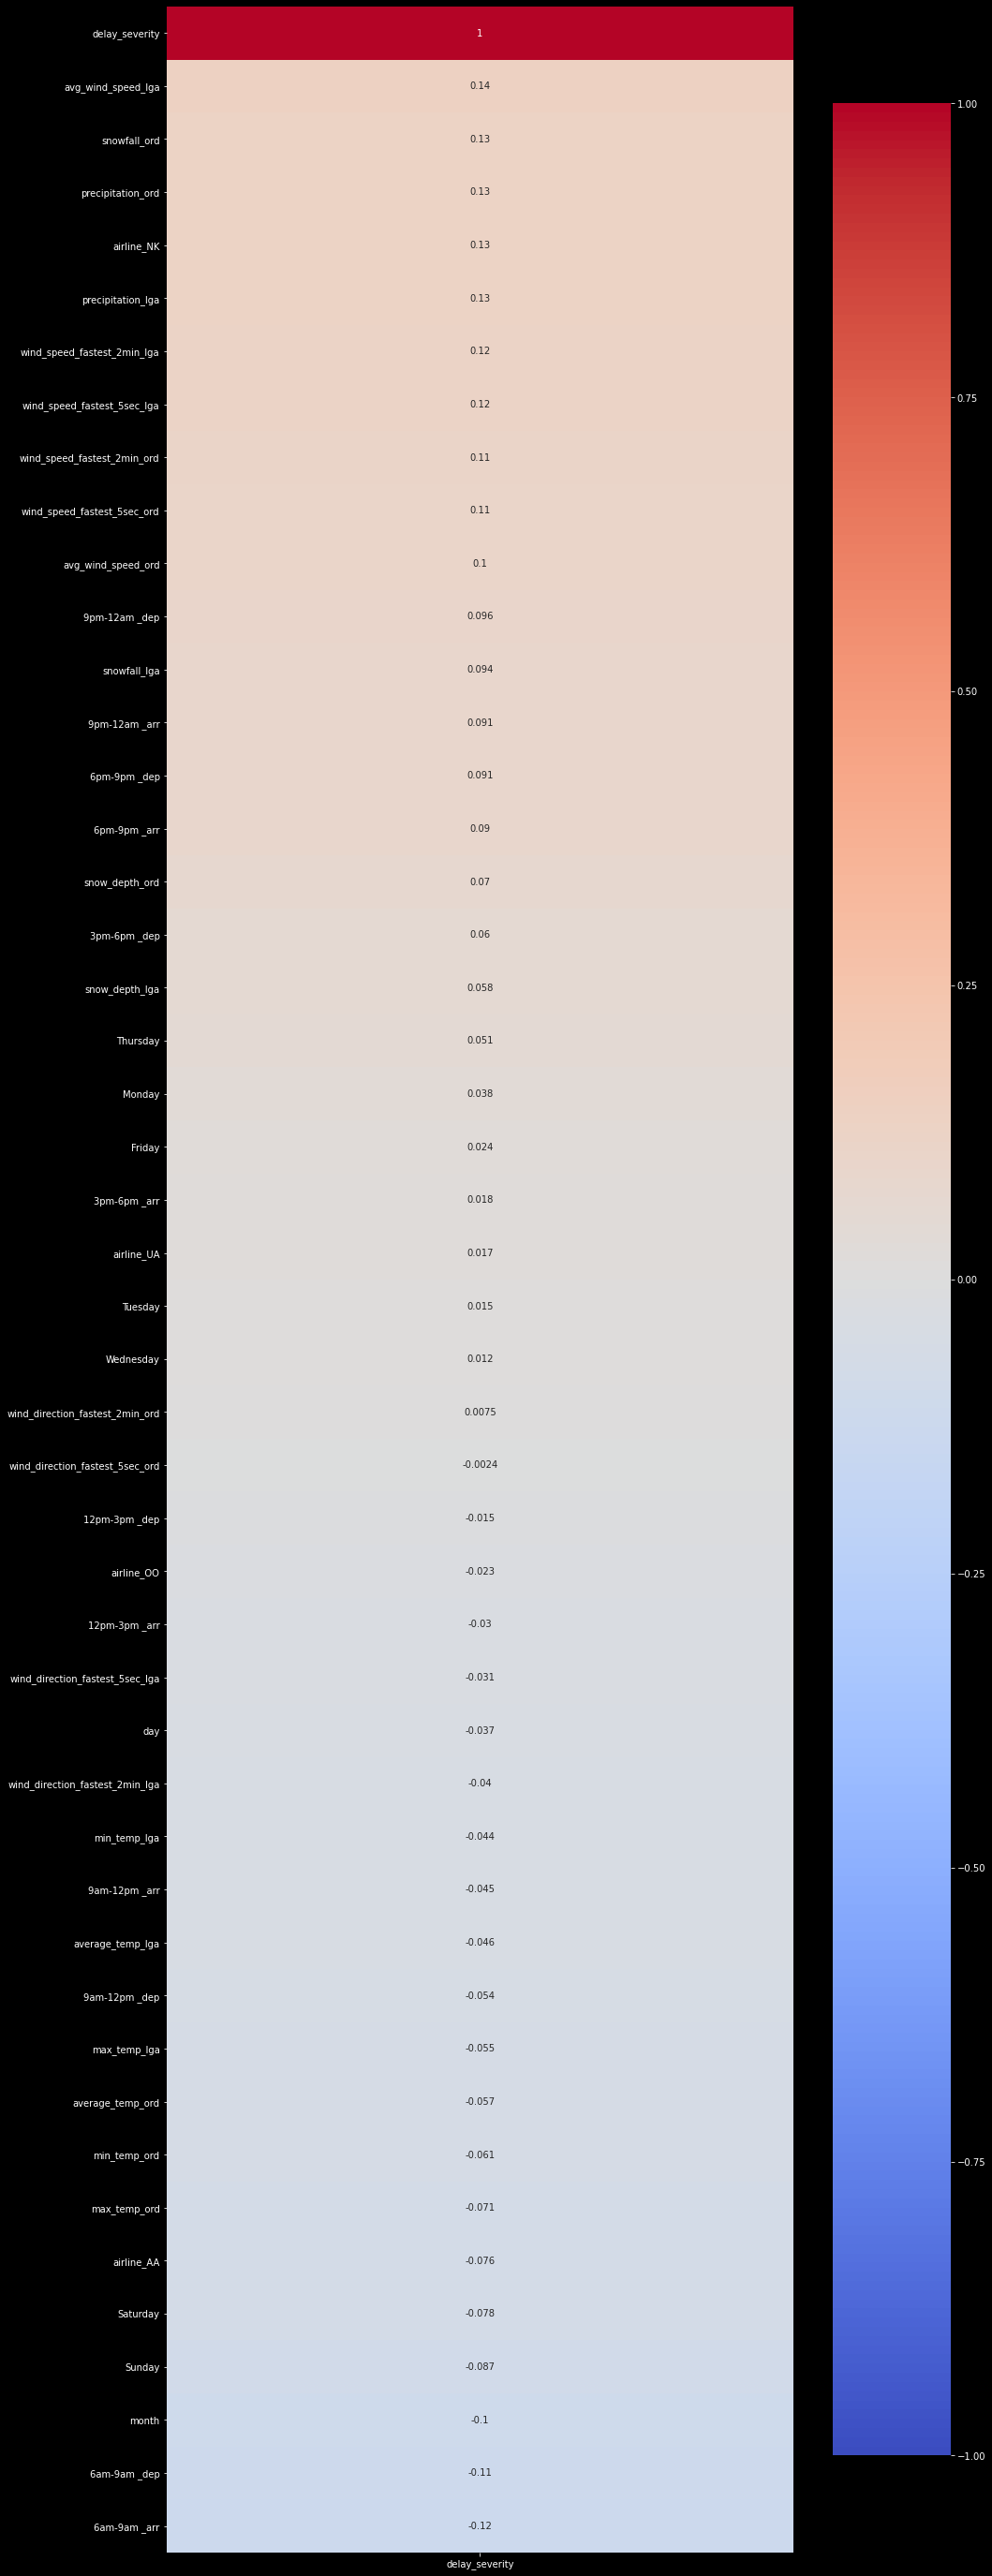

In [28]:
# Plot a heatmap with all variables against the target variable
plt.style.use('dark_background')
plt.subplots(figsize=(15,50))
plt.fontsize = 30
sns.heatmap(flight_delay_df.corr()[['delay_severity']].sort_values('delay_severity', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Correlations of each feature against the flight delay outcome is very low.

In [29]:
flight_delay_df.columns

Index(['date', 'delay_severity', 'avg_wind_speed_lga', 'precipitation_lga',
       'snowfall_lga', 'snow_depth_lga', 'average_temp_lga', 'max_temp_lga',
       'min_temp_lga', 'wind_direction_fastest_2min_lga',
       'wind_direction_fastest_5sec_lga', 'wind_speed_fastest_2min_lga',
       'wind_speed_fastest_5sec_lga', 'avg_wind_speed_ord',
       'precipitation_ord', 'snowfall_ord', 'snow_depth_ord',
       'average_temp_ord', 'max_temp_ord', 'min_temp_ord',
       'wind_direction_fastest_2min_ord', 'wind_direction_fastest_5sec_ord',
       'wind_speed_fastest_2min_ord', 'wind_speed_fastest_5sec_ord', 'month',
       'day', 'airline_AA', 'airline_NK', 'airline_OO', 'airline_UA', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       '12pm-3pm _dep', '3pm-6pm _dep', '6am-9am _dep', '6pm-9pm _dep',
       '9am-12pm _dep', '9pm-12am _dep', '12pm-3pm _arr', '3pm-6pm _arr',
       '6am-9am _arr', '6pm-9pm _arr', '9am-12pm _arr', '9pm-12am _arr'],
     

In [30]:
flight_delay_df[flight_delay_df.columns[1:13]]

,delay_severity,avg_wind_speed_lga,precipitation_lga,snowfall_lga,snow_depth_lga,average_temp_lga,max_temp_lga,min_temp_lga,wind_direction_fastest_2min_lga,wind_direction_fastest_5sec_lga,wind_speed_fastest_2min_lga,wind_speed_fastest_5sec_lga
0,0,13.87,0.00,0.0,0.0,31.0,39.0,27.0,240.0,250.0,23.0,31.1
1,0,13.87,0.00,0.0,0.0,31.0,39.0,27.0,240.0,250.0,23.0,31.1
2,2,13.87,0.00,0.0,0.0,31.0,39.0,27.0,240.0,250.0,23.0,31.1
3,0,13.87,0.00,0.0,0.0,31.0,39.0,27.0,240.0,250.0,23.0,31.1
4,0,13.87,0.00,0.0,0.0,31.0,39.0,27.0,240.0,250.0,23.0,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9174,0,11.63,0.03,0.0,0.0,47.0,50.0,43.0,320.0,330.0,21.9,28.0
9175,0,11.63,0.03,0.0,0.0,47.0,50.0,43.0,320.0,330.0,21.9,28.0
9176,0,11.63,0.03,0.0,0.0,47.0,50.0,43.0,320.0,330.0,21.9,28.0
9177,0,11.63,0.03,0.0,0.0,47.0,50.0,43.0,320.0,330.0,21.9,28.0


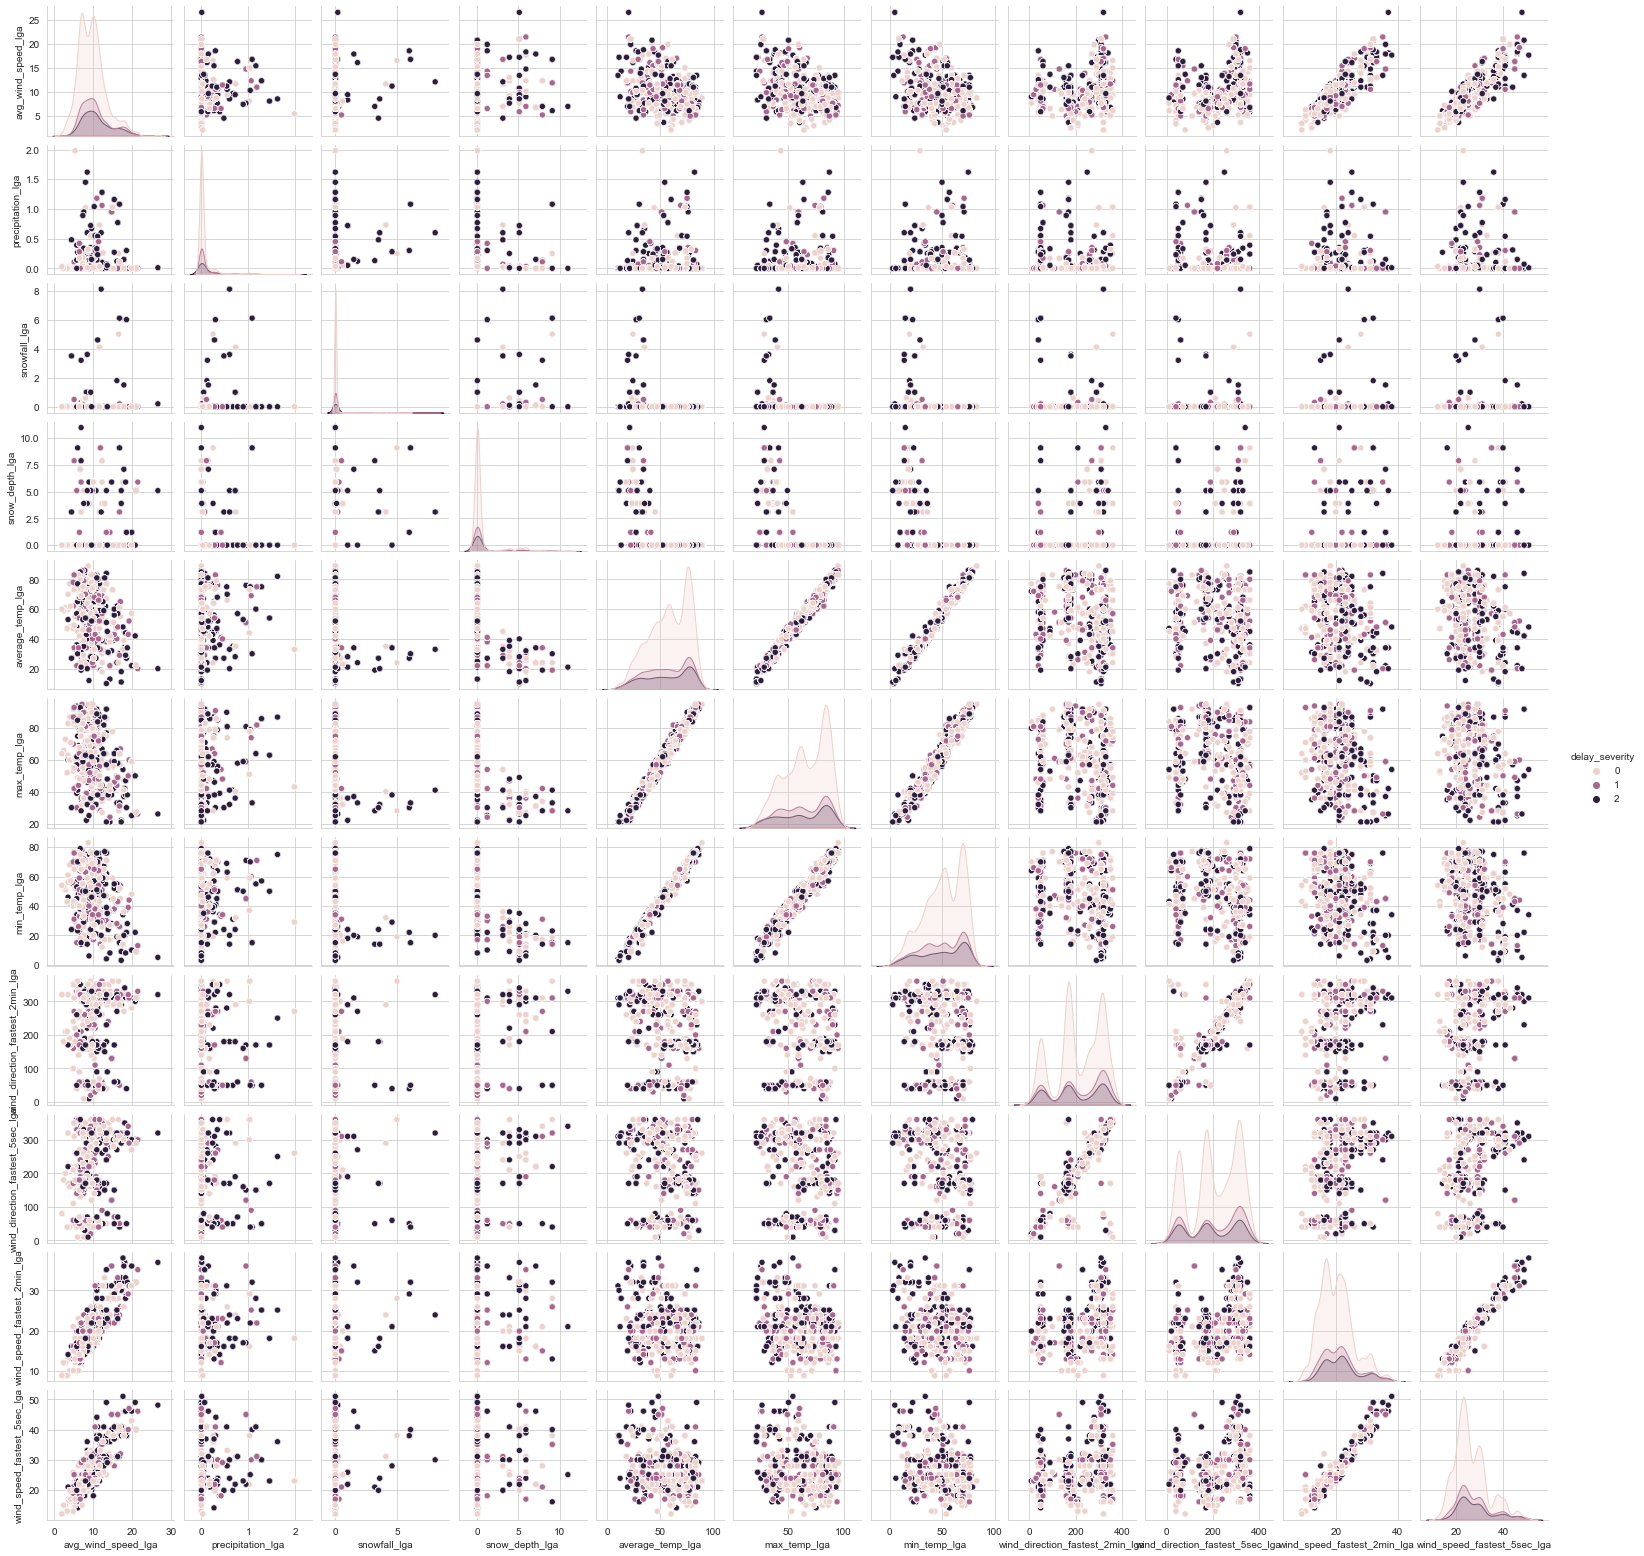

In [31]:
# plot values of LGA climate data
sns.set_style("whitegrid")
sns.pairplot(flight_delay_df[flight_delay_df.columns[1:13]], hue='delay_severity', height=2.0);

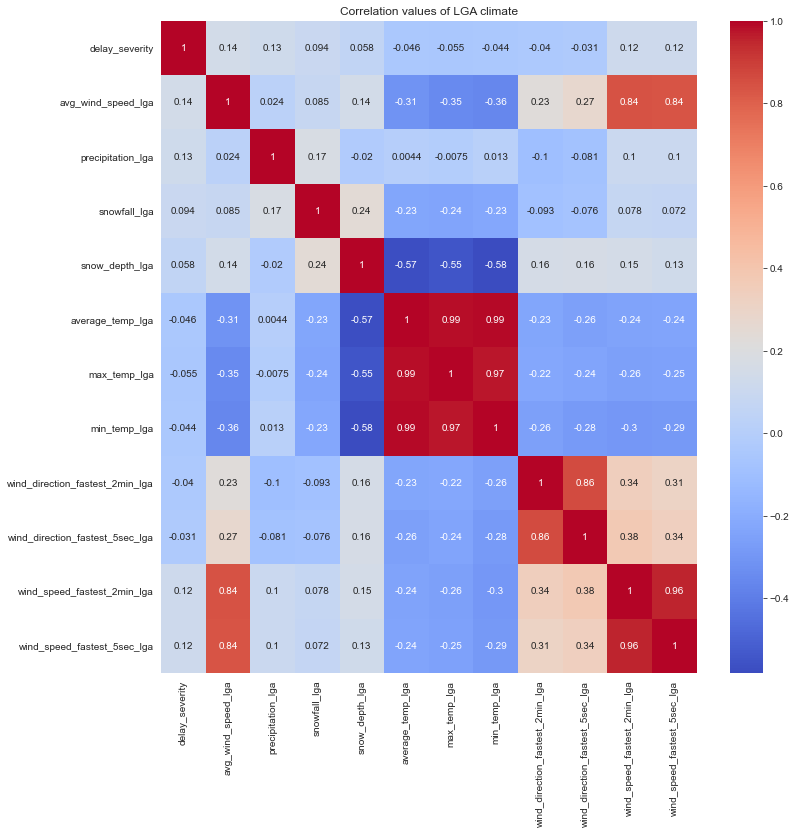

In [32]:
# plot correlations values of LGA climate
plt.figure(figsize=(12,12))
sns.heatmap(flight_delay_df[flight_delay_df.columns[1:13]].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation values of LGA climate');

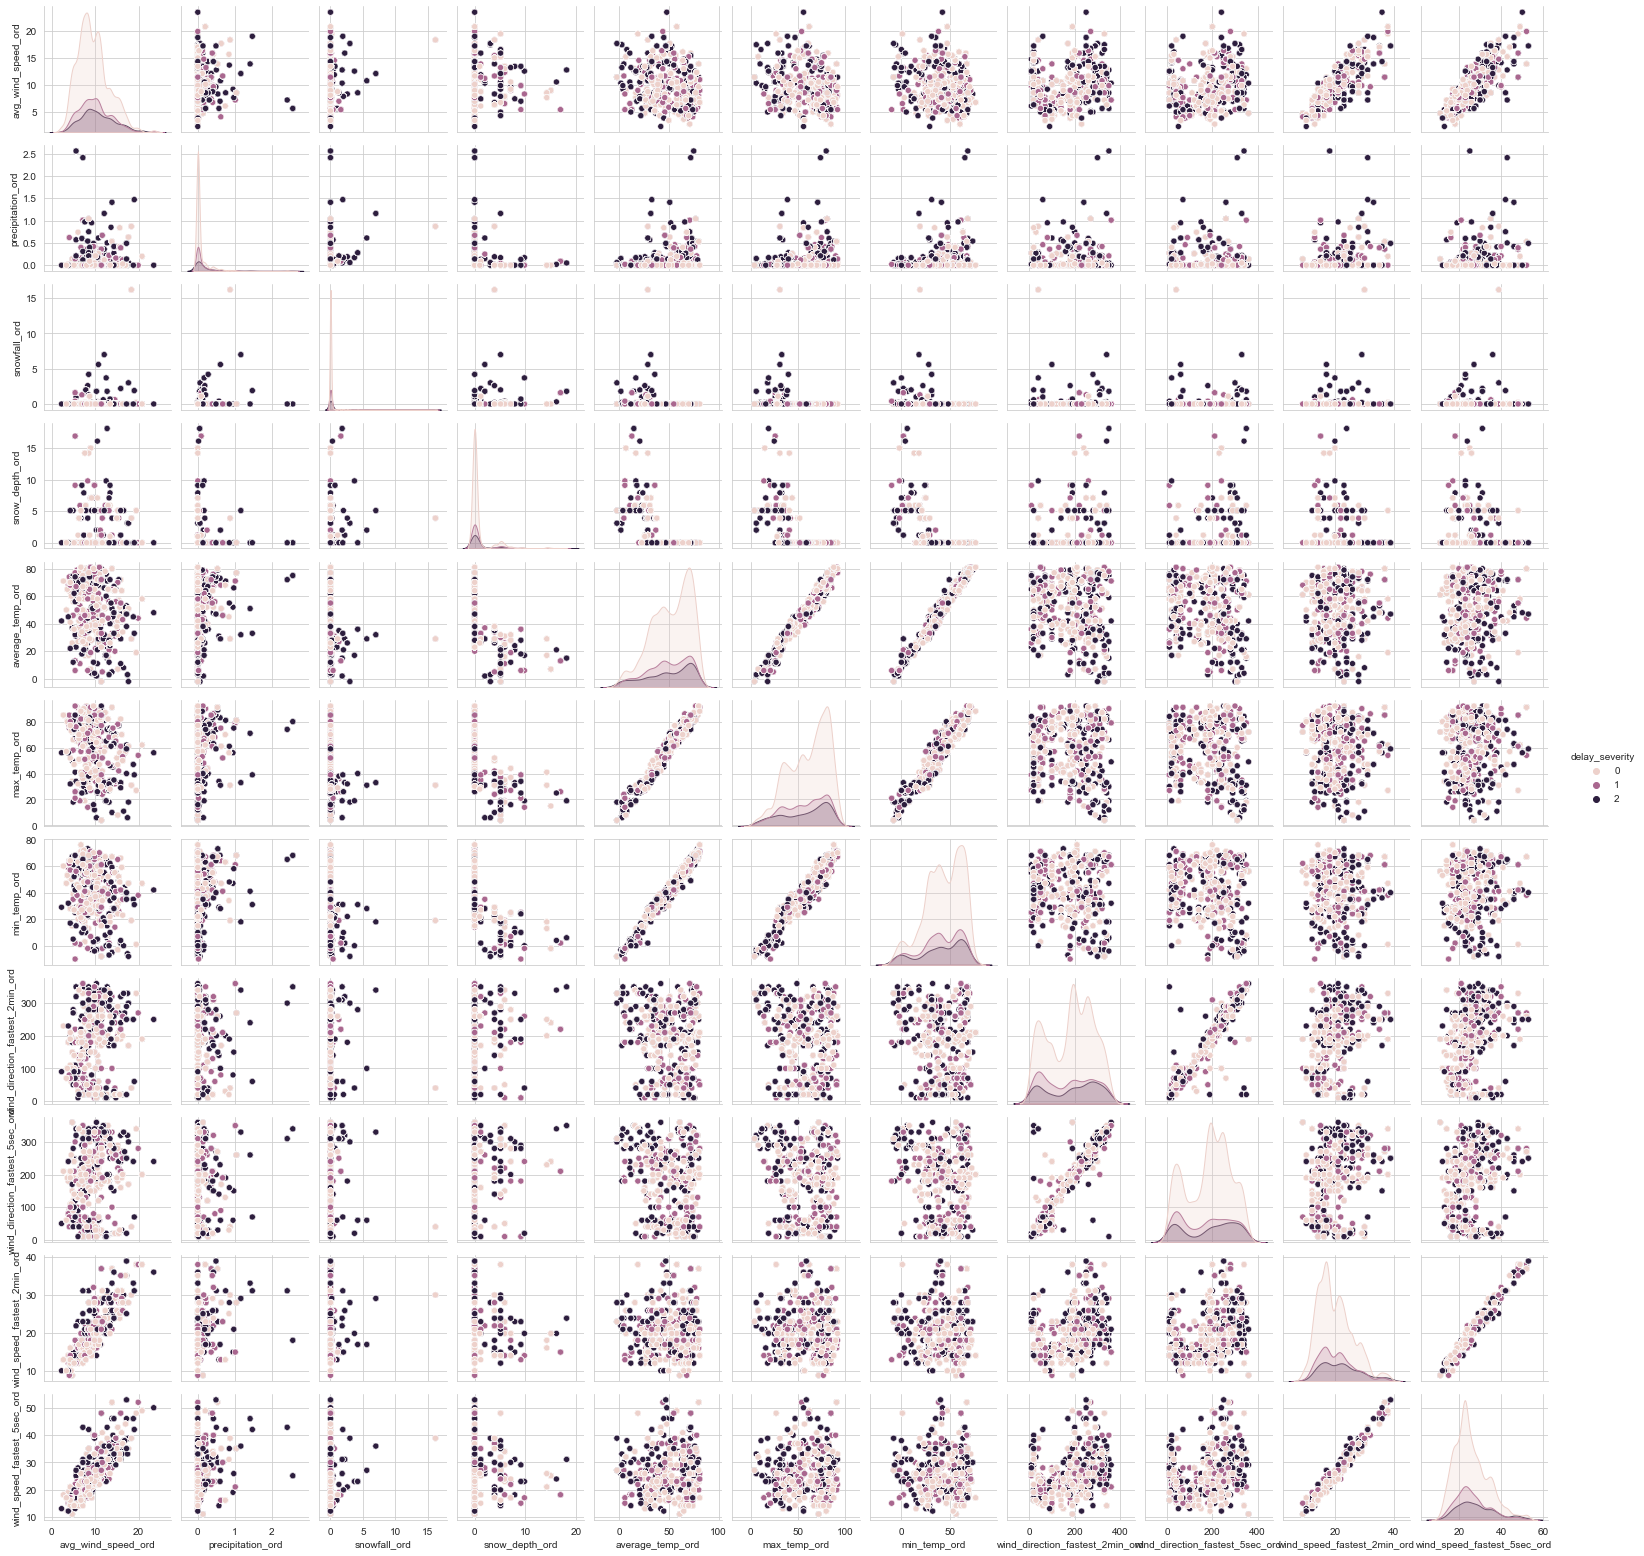

In [33]:
# plot values of ORD climate data
sns.pairplot(flight_delay_df[['delay_severity'] + list(flight_delay_df.columns[13:24])], hue='delay_severity', height=2.0);

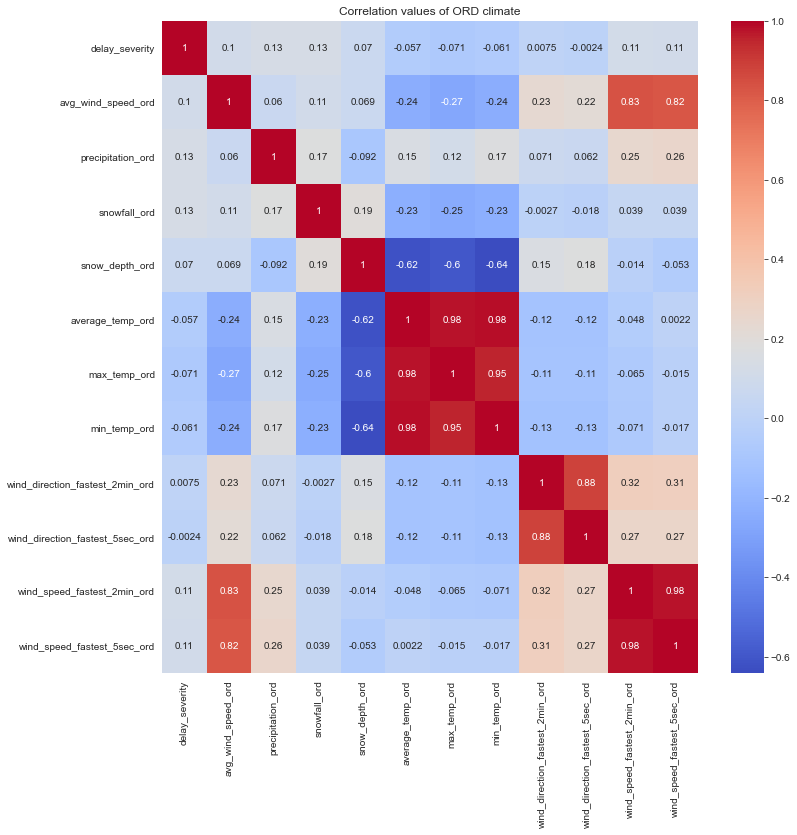

In [34]:
# plot correlations values of ORD climate
plt.figure(figsize=(12,12))
sns.heatmap(flight_delay_df[['delay_severity'] + list(flight_delay_df.columns[13:24])].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation values of ORD climate');

Linear relationships and correlations can only be found between the temperature columns and between the wind speed columns.

lga_climate_cols = list(flight_delay_df.columns[flight_delay_df.columns.str.contains('_lga')])

In [36]:
ord_climate_cols = list(flight_delay_df.columns[flight_delay_df.columns.str.contains('_ord')])

In [37]:
climate_cols = lga_climate_cols + ord_climate_cols
climate_cols.sort()

In [38]:
print(climate_cols)

['average_temp_lga', 'average_temp_ord', 'avg_wind_speed_lga', 'avg_wind_speed_ord', 'max_temp_lga', 'max_temp_ord', 'min_temp_lga', 'min_temp_ord', 'precipitation_lga', 'precipitation_ord', 'snow_depth_lga', 'snow_depth_ord', 'snowfall_lga', 'snowfall_ord', 'wind_direction_fastest_2min_lga', 'wind_direction_fastest_2min_ord', 'wind_direction_fastest_5sec_lga', 'wind_direction_fastest_5sec_ord', 'wind_speed_fastest_2min_lga', 'wind_speed_fastest_2min_ord', 'wind_speed_fastest_5sec_lga', 'wind_speed_fastest_5sec_ord']


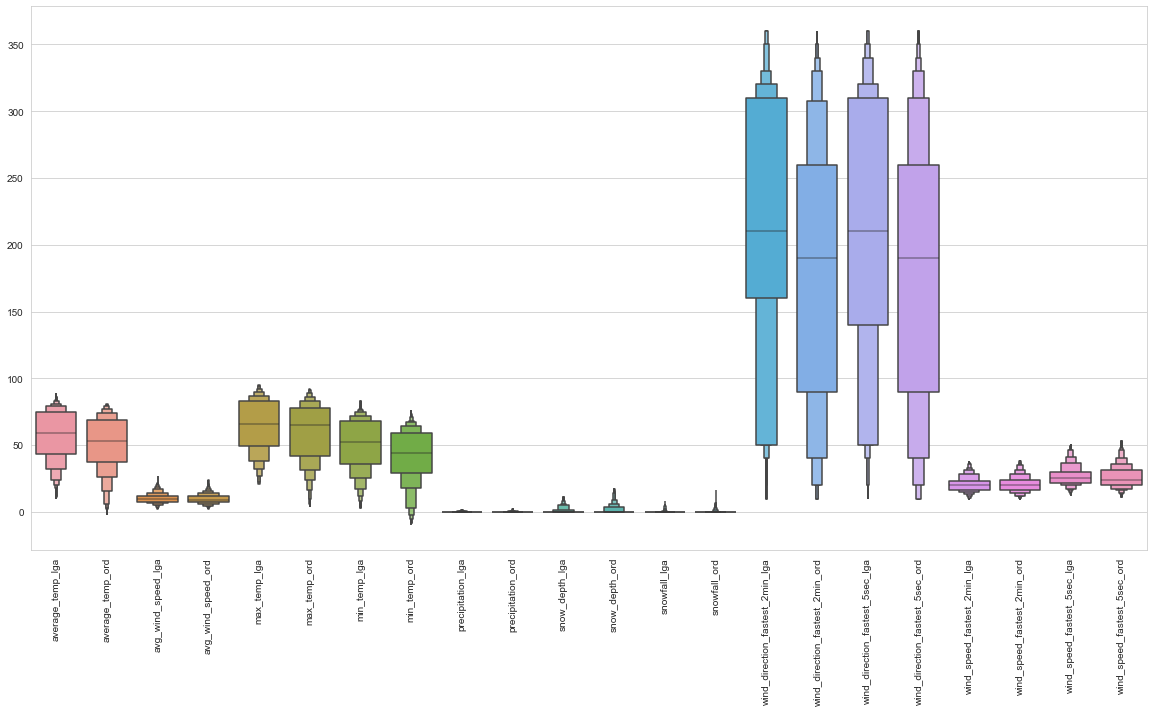

In [39]:
# plot boxplots of climate data
plt.figure(figsize=(20,10))
sns.boxenplot(data = flight_delay_df[climate_cols])
plt.xticks(rotation=90);

In [40]:
# create column lists for temp, wind speed, wind direction, precipitation/snow columns
temp_cols = list(filter(lambda col: 'temp' in col, climate_cols))
wind_speed_cols = list(filter(lambda col: 'wind_speed' in col, climate_cols))
wind_direction_cols = list(filter(lambda col: 'wind_direction' in col, climate_cols))
precip_snow_cols = list(filter(lambda col: 'precipitation' in col, climate_cols)) + list(filter(lambda col: 'snow' in col, climate_cols))

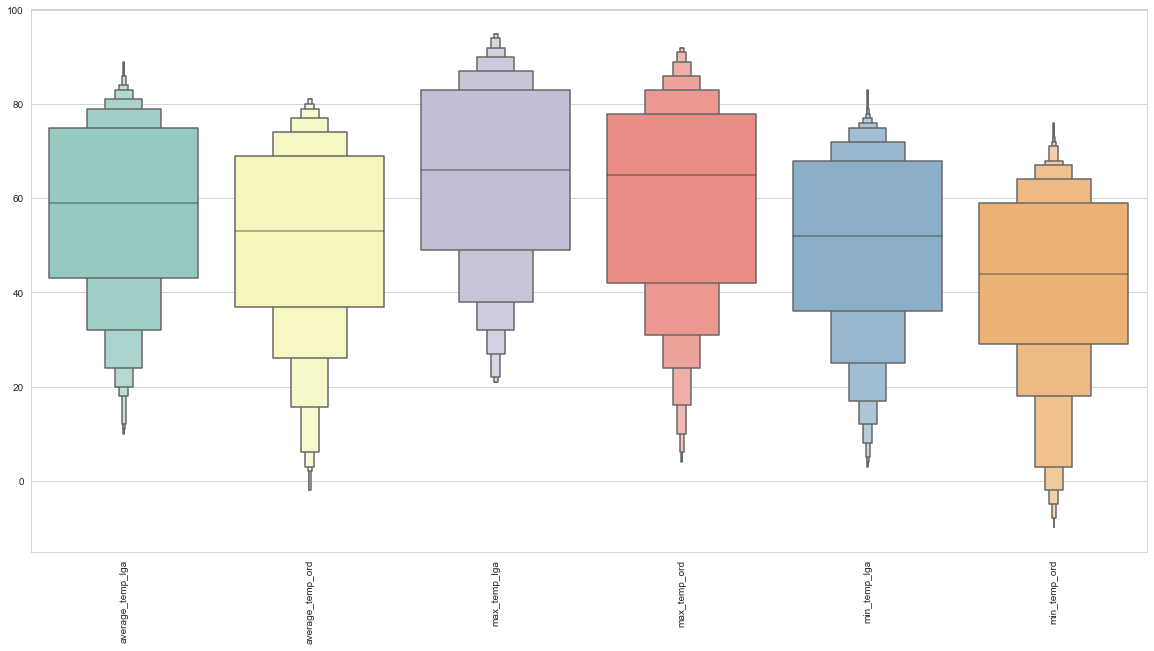

In [41]:
# plot boxplots of temperature data
plt.figure(figsize=(20,10))
sns.boxenplot(data = flight_delay_df[temp_cols])
plt.xticks(rotation=90);

The temperature is generally higher in New York compared to Chicago.

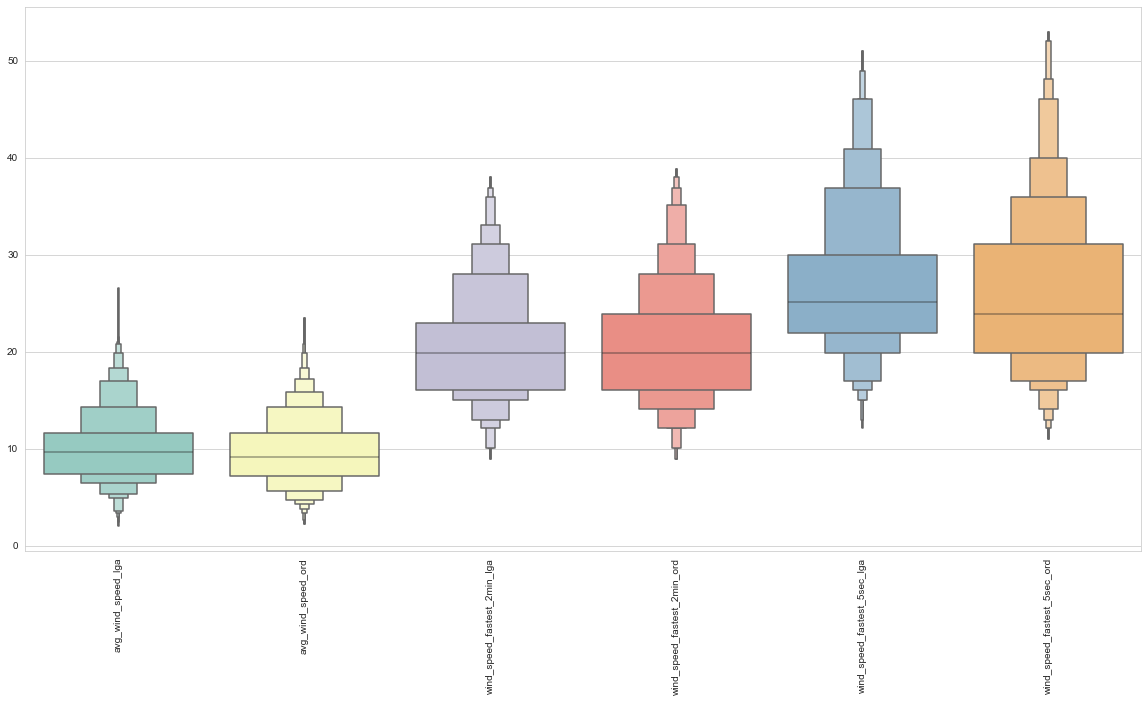

In [42]:
# plot boxplots of wind speed data
plt.figure(figsize=(20,10))
sns.boxenplot(data = flight_delay_df[wind_speed_cols])
plt.xticks(rotation=90);

The wind speed is very similar between the two cities.

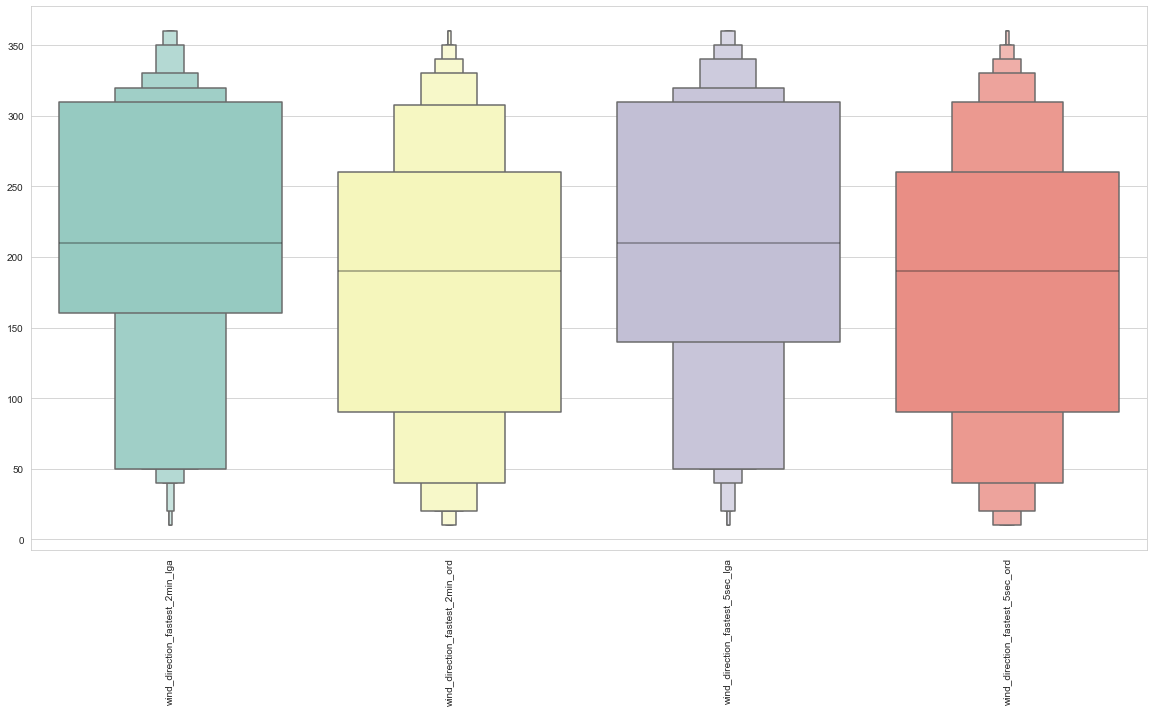

In [43]:
# plot boxplots of wind direction data
plt.figure(figsize=(20,10))
sns.boxenplot(data = flight_delay_df[wind_direction_cols])
plt.xticks(rotation=90);

Wind direction in New York is a few degrees different from Chicago.

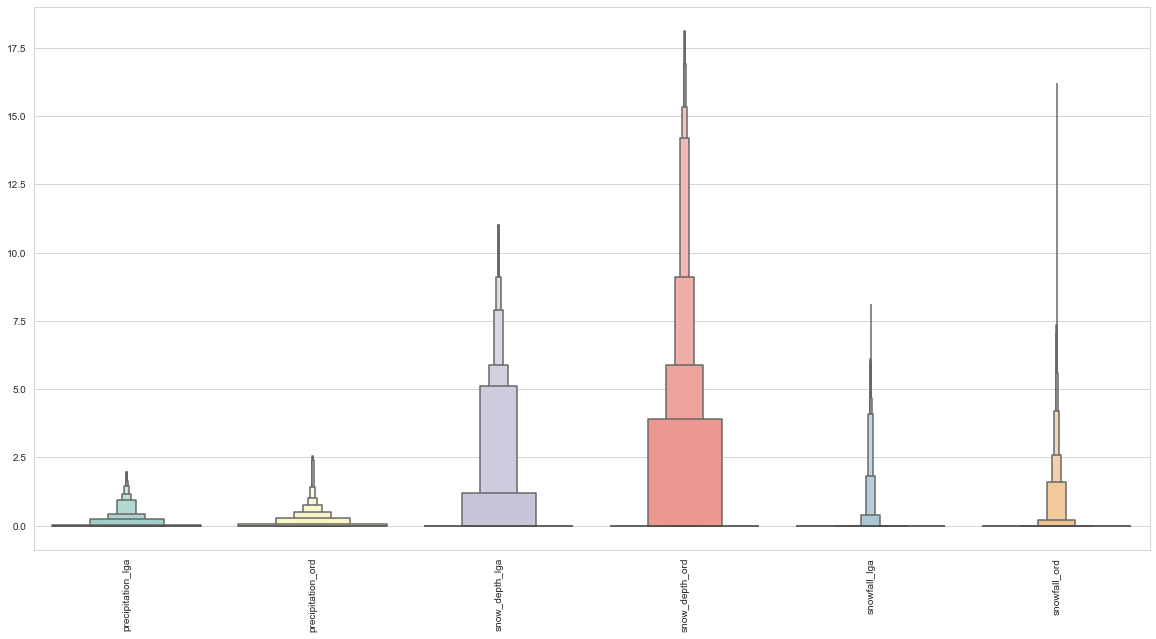

In [44]:
# plot boxplots of temperature data
plt.figure(figsize=(20,10))
sns.boxenplot(data = flight_delay_df[precip_snow_cols])
plt.xticks(rotation=90);

While precipitation is similar between Queens and Chicago, there is much more snow and a wider range of snow in Queens compared to Chicago.

In [45]:
# save cleaned data
flight_delay_df.to_csv('../data/flight_delay_cleaned.csv', index=False)